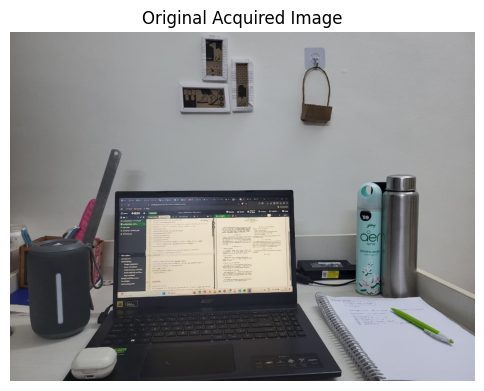

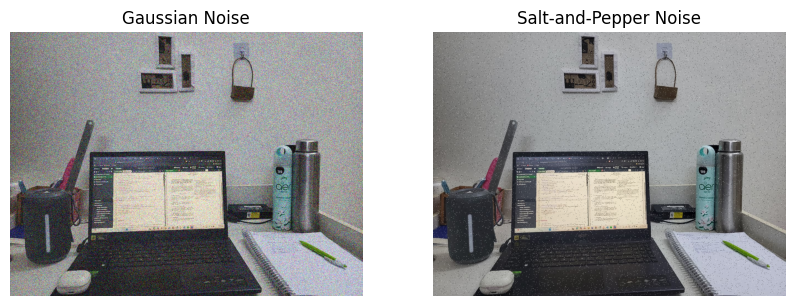

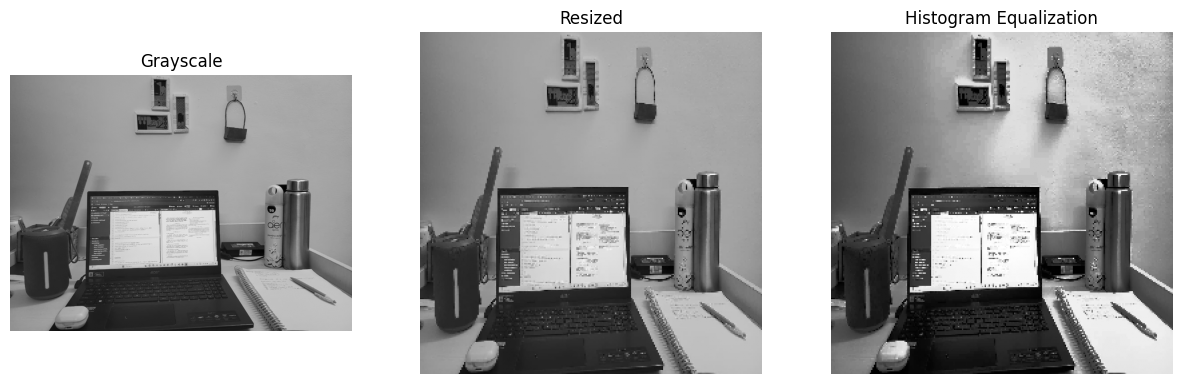

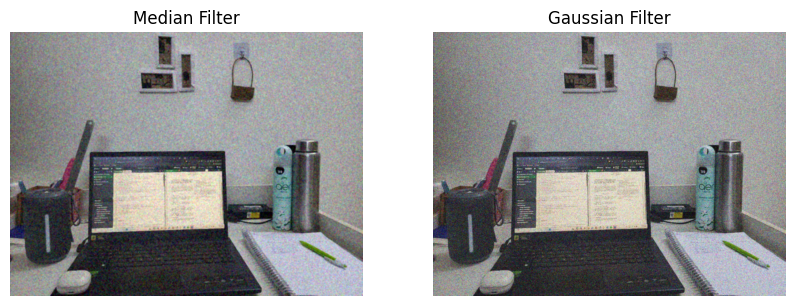

Median Filter - PSNR: 26.17, SSIM: 0.5519
Gaussian Filter - PSNR: 26.63, SSIM: 0.5364


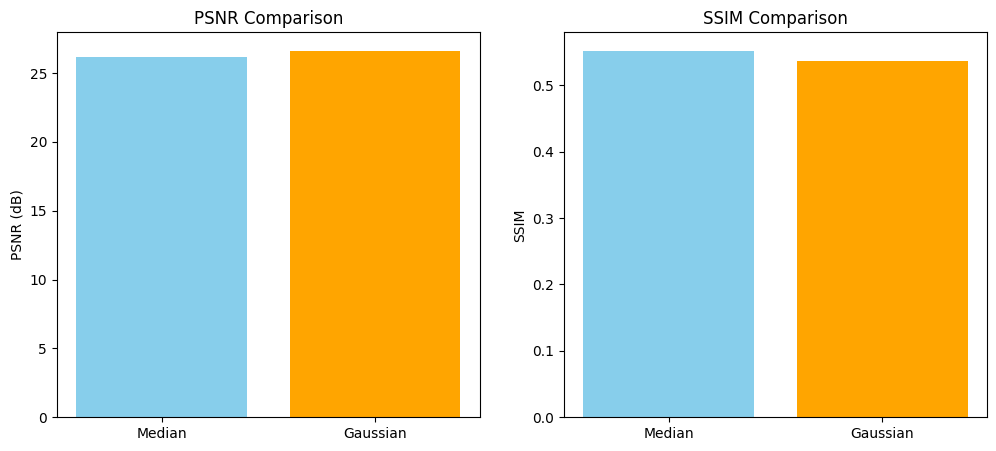

In [ ]:
# Shubham Kumar
# Reg. No.: 3122235001127
# Sec - CSE - C


# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# -------------------------------
# Step 1: Image Acquisition
# -------------------------------
image = cv2.imread("desk.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Acquired Image")
plt.axis("off")
plt.show()

# -------------------------------
# Step 2: Noise Simulation
# -------------------------------
# Gaussian noise
gaussian_noise = image + np.random.normal(0, 25, image.shape)
gaussian_noise = np.clip(gaussian_noise, 0, 255).astype(np.uint8)

# Salt-and-Pepper noise
sp_noise = np.copy(image)
prob = 0.02
rnd = np.random.rand(*image.shape[:2])
sp_noise[rnd < prob/2] = 0
sp_noise[rnd > 1 - prob/2] = 255

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(gaussian_noise); ax[0].set_title("Gaussian Noise"); ax[0].axis("off")
ax[1].imshow(sp_noise); ax[1].set_title("Salt-and-Pepper Noise"); ax[1].axis("off")
plt.show()

# -------------------------------
# Step 3: Preprocessing
# -------------------------------
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Resize
resized = cv2.resize(gray, (256,256))

# Histogram Equalization
hist_eq = cv2.equalizeHist(resized)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(gray, cmap="gray"); ax[0].set_title("Grayscale"); ax[0].axis("off")
ax[1].imshow(resized, cmap="gray"); ax[1].set_title("Resized"); ax[1].axis("off")
ax[2].imshow(hist_eq, cmap="gray"); ax[2].set_title("Histogram Equalization"); ax[2].axis("off")
plt.show()

# -------------------------------
# Step 4: Filtering
# -------------------------------
# Median filter
median_filtered = cv2.medianBlur(gaussian_noise, 5)

# Gaussian filter
gaussian_filtered = cv2.GaussianBlur(gaussian_noise, (5,5), 1)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(median_filtered); ax[0].set_title("Median Filter"); ax[0].axis("off")
ax[1].imshow(gaussian_filtered); ax[1].set_title("Gaussian Filter"); ax[1].axis("off")
plt.show()

# -------------------------------
# Step 5: Quantitative Evaluation
# -------------------------------
# Convert images to grayscale for metrics
original_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
median_gray = cv2.cvtColor(median_filtered, cv2.COLOR_RGB2GRAY)
gaussian_gray = cv2.cvtColor(gaussian_filtered, cv2.COLOR_RGB2GRAY)

# Compute PSNR and SSIM
median_psnr = psnr(original_gray, median_gray)
gaussian_psnr = psnr(original_gray, gaussian_gray)

median_ssim = ssim(original_gray, median_gray)
gaussian_ssim = ssim(original_gray, gaussian_gray)

print("Median Filter - PSNR: {:.2f}, SSIM: {:.4f}".format(median_psnr, median_ssim))
print("Gaussian Filter - PSNR: {:.2f}, SSIM: {:.4f}".format(gaussian_psnr, gaussian_ssim))

# -------------------------------
# Step 6: Visualization of Metrics
# -------------------------------
filters = ["Median", "Gaussian"]
psnr_values = [median_psnr, gaussian_psnr]
ssim_values = [median_ssim, gaussian_ssim]

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].bar(filters, psnr_values, color=['skyblue','orange'])
ax[0].set_title("PSNR Comparison")
ax[0].set_ylabel("PSNR (dB)")

ax[1].bar(filters, ssim_values, color=['skyblue','orange'])
ax[1].set_title("SSIM Comparison")
ax[1].set_ylabel("SSIM")

plt.show()
